# Programación para la Bioinformática

Unidad 4: ADN, ARN, secuencias y motivos (Parte 1)
--------------------------------------------------

### Instrucciones de uso
A continuación se presentarán explicaciones y ejemplos de uso de la librería BioPython en el contexto del manejo de secuencias de ADN, ARN y proteínas. Recordad que podéis ir ejecutando los ejemplos para obtener sus resultados.

### Primeros pasos
Como siempre, vamos a importar la librería y comprobar que todo funciona:

In [2]:
!pip install biopython
import Bio     #Es importante ejecutar esta celda cada vez que cerremos y abramos el fichero si queremos ejecutar recursos de biopython

     |████████████████████████████████| 2.3 MB 5.3 MB/s 


La información genómica que contiene nucleótidos (o también secuencias de residuos peptídicos, los aminoácidos esenciales que forman las proteínas) suele encontrarse en forma de fichero FASTA. FASTA es un conocido paquete bioinformático y el formato de fichero para secuencias es muy utilizado por la comunidad y casi supone un estándar.

Un fichero FASTA es un simple fichero de texto plano con el siguiente formato:

>`>Identificador_secuencia_1`<br>
>`MTEITAAMVKELRESTGAGMMDCKNALSETNGDFDKAVQLLREKGLGKAAKKADRLAAEG`
>`LVSVKVSDDFTIAAMRPSYLSYEDLDMTFVENEYKALVAELEKENEERRRLKDPNKPEHK`<br>
>`>Identificador_secuencia_2`<br>
>`SATVSEINSETDFVAKNDQFIALTKDTTAHIQSNSLQSVEELHSSTINGVKFEEYLKSQI`
>`ATIGENLVVRRFATLKAGANGVVNGYIHTNGRVGVVIAAACDSAEVASKSRDLLRQICMH`

La primera línea con el símbolo '>' se trata de un comentario en el que habitualmente se incluye algún tipo de identificador. Es posible que esta línea no aparezca puesto que no es obligatoria. A continuación, tenemos la secuencia hasta el próximo símbolo '>' o hasta que el fichero acabe. Habitualmente, las líneas tienen un tamaño inferior a los 80 caracteres (por razones históricas de legibilidad en las antiguas terminales de 80 caracteres de tamaño). En este caso, la secuencia está formada por caracteres en mayúscula que representan los residuos en una proteína: M para metionina, T para treonina, etc. (http://pac.iupac.org/publications/pac/pdf/1972/pdf/3104x0639.pdf).
En el caso de una secuencia genómica, solo tendríamos alguna de las cuatro posibles bases (G, A, T o C) en caso de ADN o bien las mismas bases a excepción de U en vez de T para el ARN. Podemos encontrar saltos de secuencia (símbolo '-') u otros casos. Aquí podéis encontrar una lista más exhaustiva de ellos: https://en.wikipedia.org/wiki/FASTA_format.
En el directorio `data` tenemos un fichero FASTA de ejemplo, `multipleSeqs.fa`. Vamos a leerlo con BioPython:

In [3]:
from Bio import SeqIO

# Obtenemos todas las secuencias que encuentre en el fichero, indicando el 
# tipo de formato 'fasta':
!wget -nc https://gitlab.uoclabs.uoc.es/prog_bioinf/data/-/raw/master/Unidad4/multipleSeqs.fa --no-check-certificate # Descargamos el fichero a nuestro drive
records = SeqIO.parse("multipleSeqs.fa", "fasta")
for seq_record in records:
    # Para cada secuencia, imprimiremos su id y su longitud
    print('ID: "', seq_record.id, '" - longitud: ', len(seq_record))

--2021-12-21 21:26:12--  https://gitlab.uoclabs.uoc.es/prog_bioinf/data/-/raw/master/Unidad4/multipleSeqs.fa
Resolving gitlab.uoclabs.uoc.es (gitlab.uoclabs.uoc.es)... 34.245.111.244
Connecting to gitlab.uoclabs.uoc.es (gitlab.uoclabs.uoc.es)|34.245.111.244|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 1718 (1.7K) [text/plain]
Saving to: ‘multipleSeqs.fa’

multipleSeqs.fa     100%[===================>]   1.68K  --.-KB/s    in 0s      

2021-12-21 21:26:12 (229 MB/s) - ‘multipleSeqs.fa’ saved [1718/1718]

ID: " NT_033779.5 " - longitud:  134
ID: " NC_004353.4 " - longitud:  125
ID: " AM711902.1 " - longitud:  140
ID: " NC_024512.1 " - longitud:  81
ID: " NC_019843.3 " - longitud:  300
ID: " NC_001802.1 " - longitud:  557


Cada uno de los `seq_record` que leemos es un objeto `SeqRecord` que contiene un objeto de tipo `Seq` (una secuencia en BioPython) junto a otros metadatos, como su id, por ejemplo. Vamos ahora a contar el número de nucleótidos de cada tipo:

In [4]:
from Bio import SeqIO

records = SeqIO.parse("multipleSeqs.fa", "fasta")
for i, seq_record in enumerate(records):
    print("Secuencia %d:" % i)
    print("Número de A's: %d" % seq_record.seq.count("A"))
    print("Número de C's: %d" % seq_record.seq.count("C"))
    print("Número de G's: %d" % seq_record.seq.count("G"))
    print("Número de T's: %d" % seq_record.seq.count("T"))
    print()

Secuencia 0:
Número de A's: 39
Número de C's: 26
Número de G's: 29
Número de T's: 40

Secuencia 1:
Número de A's: 46
Número de C's: 0
Número de G's: 0
Número de T's: 79

Secuencia 2:
Número de A's: 45
Número de C's: 33
Número de G's: 26
Número de T's: 36

Secuencia 3:
Número de A's: 32
Número de C's: 17
Número de G's: 10
Número de T's: 22

Secuencia 4:
Número de A's: 63
Número de C's: 62
Número de G's: 70
Número de T's: 105

Secuencia 5:
Número de A's: 165
Número de C's: 114
Número de G's: 166
Número de T's: 112



### Ejercicio 1
Escribid el código para contar el número de bases como el ejemplo anterior, pero **SIN utilizar la librería BioPython**. El output tiene que ser idéntico al del ejemplo anterior.

In [5]:
# 
import os
# !wget -nc https://gitlab.uoclabs.uoc.es/prog_bioinf/data/-/raw/master/Unidad4/multipleSeqs.fa --no-check-certificate # Descargamos el fichero a nuestro drive
# Abrimos el fichero y le asignamos nombre 
# Creamos la variable con todos los datos 
# Separamos las secuencias indicando que el separador es ">"
# Quitamos todos los huecos en blanco ya que al separar por ">" y el texto comienza por ">", considera que antes del primer separador hay un grupo.
with open("multipleSeqs.fa") as file_content:
  data=file_content.read()
  secuencias=data.split(">")
  secuencias.remove("")

# Ahora creamos un diccionario
# Cremos un bucle que recorra cada secuencia
  nucleotidos=dict()
  for secuencia in secuencias:
    # Hacemos que la secuencia se separe por saltos de linea y así separamos el titulo del contenido de información
    contenido=secuencia.split(os.linesep)
    # Guardamos el titulo
    titulo=contenido[0]
    # Eliminamos el primer elemento de la lista para que solo nos quede el conjunto de nucleótidos
    contenido.pop(0)
    # Ahora juntamos todos los nucleótidos en un solo elemento ya que hasta ahora estaban separados en diferentes elementos por los saltos de linea
    nucleotidos[titulo]="".join(contenido)
    # Ahora creamos otro bucle que recorra cada nucleótido y los vaya contando
  for clave,value in nucleotidos.items():
    A=0
    G=0
    C=0
    T=0
    # Creamos cuatro variables donde almacenamos el recuento de cada uno de los nucleótidos 
    for letra in value:
      if letra=="A":
        A+=1
      elif letra=="G":
        G+=1
      elif letra=="C":
        C+=1
      elif letra=="T":
        T+=1
        # Finalmente imprimimos todo comenzando por la clave que es el título de cada secuencia
    print(clave)
    print("El número de adeninas es: ", A)
    print("El número de guaninas es: ", G)
    print("El número de citosinas es: ",C)
    print("El número de timinas es: ",T)
    print("-----")


NT_033779.5 Drosophila melanogaster chromosome 2L
El número de adeninas es:  39
El número de guaninas es:  29
El número de citosinas es:  26
El número de timinas es:  40
-----
NC_004353.4 Drosophila melanogaster chromosome 4
El número de adeninas es:  46
El número de guaninas es:  0
El número de citosinas es:  0
El número de timinas es:  79
-----
AM711902.1 Canis lupus lupus complete mitochondrial genome
El número de adeninas es:  45
El número de guaninas es:  26
El número de citosinas es:  33
El número de timinas es:  36
-----
NC_024512.1 Drosophila melanogaster chromosome Y
El número de adeninas es:  32
El número de guaninas es:  10
El número de citosinas es:  17
El número de timinas es:  22
-----
NC_019843.3 Middle East respiratory syndrome-related coronavirus isolate HCoV-EMC/2012
El número de adeninas es:  63
El número de guaninas es:  70
El número de citosinas es:  62
El número de timinas es:  105
-----
NC_001802.1 Human immunodeficiency virus 1, complete genome
El número de aden

#### Notas importantes

- No podeis coger el contenido del fichero y copiar en la celda como si fuera un string.
- Cada nueva secuencia viene identificada por el carácter '>'. Utilizad todo lo que viene después de ese carácter y hasta que acabe la línea para utilizarlo como la clave de un diccionario. El valor para esa clave será el resto de la secuencia que tenéis que tratar.

### Contenido GC
En genética, el contenido de guanina y citosina (GC) se entiende como el porcentaje entre los pares Guanina-Citosina en la molécula de ADN o genoma y el resto de bases. Este porcentaje se calcula de la siguiente forma:

$(G + C) * 100 / (A + C + G + T)$

En BioPython, calcular el contenido GC es muy sencillo:

In [6]:
from Bio.Seq import Seq
from Bio.SeqUtils import GC

# Creamos un objeto secuencia que contiene los nucleótidos válidos para ADN 
# definidos por la IUPAC (Unión Internacional de Química Pura y Aplicada)
seq = Seq("ACGACACCAGCAAGAAGTCCATTGAACCTTATCATTTAGAAAGGAGAAGTCGTAACAAGGTTTCCGTAGGTGAATGGA")

# Calculamos el contenido mediante la función GC():
GC(seq)

42.30769230769231

### Ejercicio 2
Para la misma secuencia, escribid el código para calcular el contenido GC sin utilizar la librería BioPython:

In [7]:
# Creamos una función y definimos las variables A, G, C y T
def GC (seq):
  A=0
  G=0
  C=0
  T=0
  # Cremoas un bucle que las recorra y las cuente
  for letra in seq:
      if letra=="A":
        A+=1
      elif letra=="G":
        G+=1
      elif letra=="C":
        C+=1
      elif letra=="T":
        T+=1
        # Pedimos que nos devuelva el resultado
  return(G+C)*100/(G+C+A+T)
  

###########
# Llamada:
seq="ACGACACCAGCAAGAAGTCCATTGAACCTTATCATTTAGAAAGGAGAAGTCGTAACAAGGTTTCCGTAGGTGAATGGA"
resultado=GC(seq)
print(resultado)
# Podríamos no usar print(resultado) porque collab podría mostrar directamente el resultado con return, pero así es más correcto de cara a otros entornos que sí lo necesitan.
# En la llamada también podríamos poner solamente:
# GC("ACGACACCAGCAAGAAGTCCATTGAACCTTATCATTTAGAAAGGAGAAGTCGTAACAAGGTTTCCGTAGGTGAATGGA")
# y con eso indicamos que seq="ACGACACCAGCAAGAAGTCCATTGAACCTTATCATTTAGAAAGGAGAAGTCGTAACAAGGTTTCCGTAGGTGAATGGA"

#def saludar(nombre):
#  print("hola",nombre)
#seq="Luismi"
#saludar(seq) 

42.30769230769231


### Estructura secundaria del ADN
La molécula de ADN tiene una forma de doble hélice. El orden en secuencia de los nucleótidos determina lo que conocemos como estructura primaria del ADN. La doble hélice se forma gracias a la complementariedad de las bases A y T y C y G, respectivamente. Hablamos de estructura secundaria cuando nos referimos a que las bases A y T son complementarias y que C y G también. Por estructura terciaria entendemos cómo se unen estas bases a la estructura principal que las soporta y forma una doble hélice en forma de espiral. 


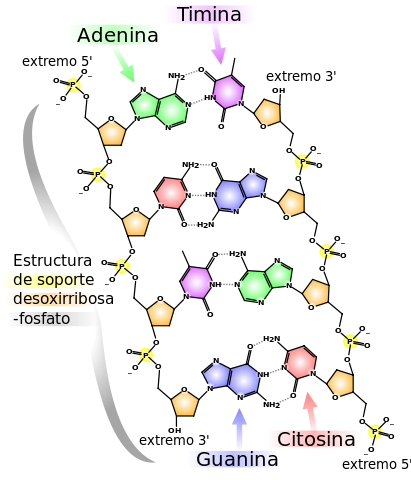)

Fuente: "DNA chemical structure" - Wikimedia Commons https://commons.wikimedia.org/wiki/File:DNA_chemical_structure_es.svg#/media/File:DNA_chemical_structure_es.svg)

Es interesante conocer, dada una secuencia con bases A, C, G o T, cuál es su secuencia reversa complementaria. Vamos a ver cómo hacerlo mediante BioPython:

In [8]:
from Bio.Seq import Seq

seq = Seq("AACGACACCAGCAAGAAGTCCATTGAACCTTATCATTTAGAAAGGAGAAGTCGTAACAAGGTTTCCGTAGGTGAATGGA")

# Calculamos la secuencia complementaria
print(seq.reverse_complement())

TCCATTCACCTACGGAAACCTTGTTACGACTTCTCCTTTCTAAATGATAAGGTTCAATGGACTTCTTGCTGGTGTCGTT


### Ejercicio 3
Como ya va siendo habitual en esta unidad, escribid un código en Python que calcule para la secuencia anterior su secuencia reversa complementaria sin utilizar la librería BioPython:

In [9]:
# Creamos una función que en primer lugar nos de la secuencia complementaria
def comple(seq):
  # Creamos una variable vacía
  seqcomple=""
  # Y creamos un bucle que recorra nuestra secuencia y vaya realizando los cambios que le indicamos
  for base in seq:
    if base=="A":
      seqcomple+="T"
    elif base=="T":
      seqcomple+="A"
    elif base=="G":
      seqcomple+="C"
    elif base=="C":
      seqcomple+="G"
  return seqcomple

# Para crear la reversa tenemos una orden en Python que la crea directamente
def rever(seq):
  return seq[::-1]


#######
# Llamada funcion 1
seq="AACGACACCAGCAAGAAGTCCATTGAACCTTATCATTTAGAAAGGAGAAGTCGTAACAAGGTTTCCGTAGGTGAATGGA"
comple(seq)

# Recuerda que la funcion tambien se puede llamar directamente así:
# comple("AACGACACCAGCAAGAAGTCCATTGAACCTTATCATTTAGAAAGGAGAAGTCGTAACAAGGTTTCCGTAGGTGAATGGA")

# Llamada funcion 2
print(rever(comple(seq)))


TCCATTCACCTACGGAAACCTTGTTACGACTTCTCCTTTCTAAATGATAAGGTTCAATGGACTTCTTGCTGGTGTCGTT


### Transcripción y traduccion
Como ya explicamos en la introducción de esta unidad, el ADN se transcribe a una molécula intermedia, el ARN, antes de ser traducido finalmente a proteína. Podemos simular también este aparato biológico mediante la libreria BioPython:

In [10]:
from Bio.Seq import Seq

seq = Seq("ACGACACAGCAAGAAGTCCATACCTTATCATTTAGAGGAAGGAGAAGTCGTAACAAGGTTTCCGTAGGTGAACCCTGA")

# Transcribimos
mRNA = seq.transcribe()

# Y traducimos
mRNAt=mRNA.translate()
print (mRNAt)

# El * indica que es un codon que no se traduce a proteina. En este caso se trata de un codón stop.

TTQQEVHTLSFRGRRSRNKVSVGEP*


### Codones
Un codón es un triplete de nucleótidos y cada triplete codifica un aminoácido (residuo), aunque un aminoácido puede estar codificado por varios codones. Existe un codón especial, el codón de parada o terminación que no determina ningún aminoácido, pero que indica que la traducción ha de terminar y la proteína está completa. Existen tres codones de parada: TAG, el primero descubierto, TGA y TAA. En nuestro ejemplo, la librería nos avisa de este hecho. Podéis consultar una tabla de codones aquí: https://en.wikipedia.org/wiki/DNA_codon_table.

### Ejercicio 4
EcoRI es una enzima de restricción muy empleada en todos los laboratorios del mundo para cortar una hebra de ADN en dos partes. EcoRI reconoce el motivo G\*AATTC, separando la secuencia inicial de ADN por la posición indicada por el '\*'. En la siguiente secuencia, escribid un código en Python que reconozca ese motivo y la separe en dos partes:

EcoRI(ACGACACAGCATCGCGAATTCCCATCGCATTATGATTGA) = ACGACACAGCATCGCG + AATTCCCATCGCATTATGATTGA

In [11]:
# Creamos una funcion que separe la secuencia cada vez que encuentre un GAATTC
def ecori(seq):
  cortes=seq.split("GAATTC")
  # De esta forma, "GAATTC" es el punto por el que corta y por tanto perdemos esas bases, asi que añadimos una G al final del primer corte y AATTC al principio del segundo corte
  cortes[0]+="G"
  cortes[1]="AATTC"+cortes[1]
  return cortes

#########
seq = 'ACGACACAGCATCGCGAATTCCCATCGCATTATGATTGA'
print(ecori(seq))


['ACGACACAGCATCGCG', 'AATTCCCATCGCATTATGATTGA']


### Distancia de Hamming
La distancia de Hamming es una función entre dos secuencias *p* y *q* (en nuestro caso nos limitaremos a secuencias de la misma longitud), que nos indica el número de símbolos que para cada posición *i* en *p* y *q* son diferentes. Por ejemplo, sea p=CCGTA y q=ACGTC. Su distancia de Hamming será 2 (la primera y última posiciones son diferentes).

### Ejercicio 5
Dadas dos secuencias p y q, calculad su distancia de hamming:

In [12]:
p = 'CGAAGCAATTGAAACCAACCCGGCCGAGGCGCAAAAATCTGACCTCTTTGT\
TTGACCACTTAATTTATGTCTGACCACGAGAAGGGCTACTGATTTGTATGAGTAG'
q = 'GGTAGTAGTTTCGCGCAACTCGTTTTGAAAACACAAAGGAGCAGGAATTGC\
TTGTAGTTTCAGTCTAGCAAACATGTTATAACGCTAACTGTGTGCTTTACACCTC'

# En este caso solamente necesitamos contar cuantos caracteres son diferentes. Para ello creamos una funcion con dos variables (las dos secuencias)
def hamming(p, q):
    ham=0
    # Y creamos un bucle que las recorra indicando que cada vez que haya una base diferente de p en q, que sume 1 a "ham"
    for base in range(len(p)):
      if p[base]!=q[base]:
        ham+=1
    return ham

print(hamming(p, q))

71


### Motivos
En genómica, es habitual encontrar regiones de ADN idénticas en secuencia en genomas de organismos diferentes, lo que apunta a que se trata de una región conservada con muy probablemente una función muy parecida en ambos organismos.

En nuestro caso, entenderemos por motivo una secuencia *s* con longitud menor a la secuencia *t* donde querremos buscar ese motivo *len(s) < len(t)*. Por ejemplo, sean *t* y *s*:

t = GATATATGCATATACTT<br>
s = ATAT<br>

el motivo *s* aparece en las siguientes posiciones: 2, 4 y 10 (empezamos a contar en 1, no es así en Python, donde empezamos a contar desde 0).

### Ejercicio 6
Escribid una función que devuelva en una lista las posiciones donde se ha encontrado el motivo en una determinada secuencia (**devolverá la lista [-1] si no ha encontrado el motivo**):

In [13]:
import re
# Cremos una función que va a buscar todos los motivos (t) que existan dentro de la secuencia (s) en cuestion.
def buscar_motivo(t, s):
  # Usamos esta orden para que busque todos los que haya (en caso de que el motivo esté varias veces en la secuencia)
    mot=[i.start() for i in re.finditer(s,t)]
    # Ahora le indicamos qué hacer en caso de que no haya ningún motivo, en este caso que muestre [-1]
    if len(mot)==0:
      mot=[-1]
    return mot

t = 'AUGCUUCAGAAAGGUCUUACGUGCUUUA'
s = 'CUUA'
print(buscar_motivo(t, s))

t = 'AUGCUUCAGTAAGGUCUUACGUUUAGTCGATUUATCGAGTUU'
s = 'CUU'
print(buscar_motivo(t, s))

t = 'AUGCUUCAGTAAGGUCUUACGUUUAGTCGATUUATCGAGTUU'
s = 'T'
print(buscar_motivo(t, s))

t = 'AUGCUUCAGAAAGGUCUUACGU'
s = 'GU'
print(buscar_motivo(t, s))

t = 'GCGTAGTAGGTTCGCCTAGTTCCGCCGAAAGACAAAGGAGAAGGGAATGCTCCT\
AGTAGTTTCAGTCTAGCAAACATGTTATAACGCTAACTGTGTGCTGCA'
s = 'AAG'
print(buscar_motivo(t, s))

t = 'GCGTAGTAGGTTCGCCTAGTTCCGCCGAAAGACAAAGGAGAAGGGAATGCTCCT\
AGTAGTTTCAGTATAGCAAACATGTTATAACGCTAACTGTGTGCTGCA'
s = 'AGTC'
print(buscar_motivo(t, s))

[15]
[3, 15]
[9, 26, 30, 34, 39]
[13, 20]
[28, 34, 40]
[-1]


### Mutaciones puntuales
Tal y como calculamos en la distancia de Hamming, para dos secuencias de la misma longitud y dada una misma posición, definimos transición como la sustitución de una purina por otra purina (A->G o viceversa) o de una pirimidina por otra pirimidina (C->T o viceversa) y transversión cuando se sustituye una purina por una pirimidina o viceversa:

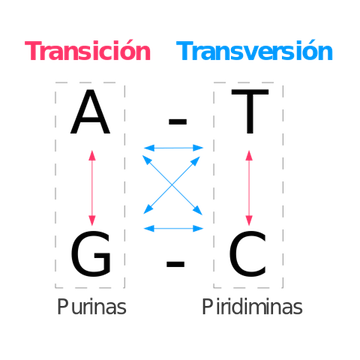

Las transversiones ocurren en menor cantidad en la naturaleza que las transiciones, dado el cambio drástico de base química y la relación de transiciones frente a las transversiones, que es de 2 de media en el genoma. Pero en las regiones codificantes, esta relación es superior (normalmente más de 3) y es interesante conocer por tanto esta relación para identificar dichas regiones.

Definimos R como la relación transiciones/transversiones. Para el siguiente ejemplo, hemos calculado el valor de R:

s1 = GCAACGCACAACGAAAACCCTTAGGGACTGGATTATTTCGTGATCGTTGTAGTTATTGGAAGTACGGGCATCAACCCAGTT<br>
s2 = TTATCTGACAAAGAAAGCCGTCAACGGCTGGATAATTTCGCGATCGTGCTGGTTACTGGCGGTACGAGTGTTCCTTTGGGT<br>

R = 1.2142857

### Ejercicio 7
Escribid un código en Python que calcule la relación entre transiciones y transversiones:

In [14]:
# Creamos la función con dos variables 
def rel_trans(s1, s2):
  # Definimos dos variables para ir almacenar el número de transiciones y de transversiones
    transi=0
    transve=0
    for base in range(len(s2)):
      # Ahora se recorren las secuencias y buscamos aquellas posiciones donde una base de s1 sea diferente con la misma posición en s2.
      if s1[base]!=s2[base]:
        # En caso de que sea diferente, indicamos que en caso de que cambie una A por G, una G por A, una C por T o una T por C, añada 1 a transicion; e
        # En caso contrario, que añada 1 a transversion
        if (s1[base]=="A" and s2[base]=="G") or (s1[base]=="G" and s2[base]=="A") or (s1[base]=="C" and s2[base]=="T") or (s1[base]=="T" and s2[base]=="C"):
          transi+=1
        else:
          transve+=1
          # Finalmente solo pedimos que calcule el número de transiciones entre transversiones
    return (transi/transve)
s1 = """TTTTGTCATTTTGCCTCGTCGTCAGGAATATTGGGACGAATTGGACTCTACT
TCTGTGGGCTGAGCCGGTTCACCCATTGACGAGTGCTAGTCACAGATGAATTACAATGAA
CGCTCGAGAAAGTGCTAATAAACGAACAGCACTAACATATGGGGGCGCGGCTGCCGGGCG
ACATGGCCGATTTAAAACACGACTGTAAGGACTGATAAACGTGTAGCATTTTCAAGTCTC
GTCGCGATGTACAAATATCGTGTTCCCTAGCTCAGGGCGCACGCTAAGGACAAACGGTGT
CACCGAATTTTCCAACGGAACACACATCAACGTGCGAGATTTCGTATGTACCCCCAT
TGTATTGAGATGGCATCTGCTCCGAACGTTGAGATCACGCCAGCACTTACAGAACATTCC
TAGTGTGGATCTATTAATAGACGGACTGAAACATTAGGGTGGGAAGTGAGCTATGGCTCA
CACCAAGCATCGGTTTCTTCTTGGACGGTGTCCCCACCATTTGTTATTGTGCTCTAG
AAACACTATAAAGCCTTTAATAAATTCACCGCTGTCGTATCCAAAAGCCGGGTCTGCCTC
CTGATGCGTCTCGCGGCTATGGCTGGGTCACACCCCGACAGTCCAGTACCGTCGGTGCCG
GAGATAGTGTCGCAGGCGTTCTATGGAGATGGACGGCCATCCATACCCAGTCAGCAAAAC
TACCGATCTCTCGGATATCTGTAGGTGGAGCTATTGTCGATAGCTATAAACCAGACTCGG
AGAGTAATATGAAATGGAAGTGAGTGCTGGCGAGGCTTTGTGTACTTGTCTGATTTTGTG
TTGATTTA"""

s2 = """CCTTGTAAGTACGCGTAGCCTCCAGGAACTTTTAGGCGAATTGTACGTCACC
TCCGGGAGCCGGGCCGGTTGATCCTTTGACAAGTCCTCACAGATGTGTCACAACCAA
CCCTTGGAAGGGTGCCAGTTAACAAGCGGTAGCAGGACATGAGGACGCGACTGCCGGAAG
ACATGACCAGCTTAAAACACAACTGTCGGGACGGAACGTACTGTATCCTTGAATCTC
GTCGCAGTGTAGAAAAGGCGTTCTCCCTGGTTCAGGGCGCATGCTAGGGATAAACGGTGT
AGTTAAAGATGACGAGGGAAGACGCATCGATGCATGTGACTCCGGATGTACCTCGGT
TATATTGAGAGGGTATCCGCTCGAGACGTTAAAATCCCGTTAGTATTCTCTGGACATTCT
TGACGTGGATCTTTGGCGCGGACTATAGTGGTAGGGCGGGGAGCGACCTATGACTCA
CATCAAGCATCAGCTTTCACTTGGACAGAACTGCGTACACATATCGTTACCGCACTTTGA
AAACATTAGGGAGCTCTTAGTAGATTAGGCGCTGTCGTATCTAAAGGCCAGATCTGTCCT
TTGCTGAATCTCGCGGCCATGTCCGTGTGAAGCCCCGACGACTTAAGGTTAGTGGCGCGA
AAGATAGGGTCGTAGGCGATCGATGGAGATGGATAGCTATGCGTATCCGTTCTGTGGTAT
GCTAAATCTCATAGATAGCTGTGGGTGAAGTTCATATAGACAGCTCTAAGCCACACCCGG
GGAATAATATGGAGTGGGAATGAGAGCTGTCGTGGCTTTGTGCACCTGTCGGATCTCCTA
TTGATCTG"""

print(rel_trans(s1, s2))

0.45965770171149145


In [15]:
# Para comprobar que mi función es correcta he utilizado el ejemplo para ver si me da el mismo resultado y efectivamente sí.
def rel_trans(s1, s2):
    transi=0
    transve=0
    for base in range(len(s2)):
      if s1[base]!=s2[base]:
        if (s1[base]=="A" and s2[base]=="G") or (s1[base]=="G" and s2[base]=="A") or (s1[base]=="C" and s2[base]=="T") or (s1[base]=="T" and s2[base]=="C"):
          transi+=1
        else:
          transve+=1
    return (transi/transve)

s1 = "GCAACGCACAACGAAAACCCTTAGGGACTGGATTATTTCGTGATCGTTGTAGTTATTGGAAGTACGGGCATCAACCCAGTT"
s2 = "TTATCTGACAAAGAAAGCCGTCAACGGCTGGATAATTTCGCGATCGTGCTGGTTACTGGCGGTACGAGTGTTCCTTTGGGT"
print(rel_trans(s1,s2))

1.2142857142857142


### Filogenia
BioPython nos permite manejar y representar árboles filogenéticos (https://es.wikipedia.org/wiki/%C3%81rbol_filogen%C3%A9tico) de forma ágil y sencilla. En el siguiente ejemplo, utilizamos un fichero de nombre *simple.dnd* que representa un árbol en formato Newick (https://en.wikipedia.org/wiki/Newick_format) y lo representamos:

--2021-12-21 21:26:13--  https://gitlab.uoclabs.uoc.es/prog_bioinf/data/-/raw/master/Unidad4/simple.dnd
Resolving gitlab.uoclabs.uoc.es (gitlab.uoclabs.uoc.es)... 34.245.111.244
Connecting to gitlab.uoclabs.uoc.es (gitlab.uoclabs.uoc.es)|34.245.111.244|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 44 [text/plain]
Saving to: ‘simple.dnd’

simple.dnd          100%[===================>]      44  --.-KB/s    in 0s      

2021-12-21 21:26:13 (7.51 MB/s) - ‘simple.dnd’ saved [44/44]

Tree(rooted=True, weight=1.0)
    Clade()
        Clade()
            Clade()
                Clade(name='A')
                Clade(name='B')
            Clade()
                Clade()
                    Clade(name='C')
                    Clade(name='D')
                        Clade(name='E')
                        Clade(name='F')
        Clade()
            Clade()
                Clade(name='G')
                Clade(name='H')


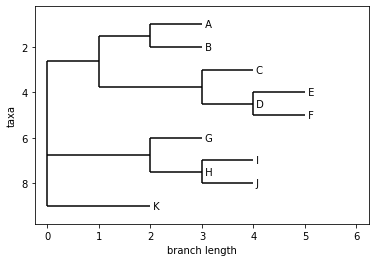

In [16]:
%matplotlib inline

from Bio import Phylo

# Cargamos el árbol desde el fichero
!wget -nc https://gitlab.uoclabs.uoc.es/prog_bioinf/data/-/raw/master/Unidad4/simple.dnd --no-check-certificate # Descargamos el fichero a nuestro drive
tree = Phylo.read("simple.dnd", "newick")

# El árbol tiene una raíz
tree.rooted = True

# Imprimimos la representación del árbol
print(tree)

# Creamos una imagen del árbol
Phylo.draw(tree)

### Ejercicio 8
Las posibilidades que ofrece la librería son muy variadas, podéis revisar la documentación oficial: http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc154

Diseñad vuestro propio árbol filogenético en algún formato reconocible por BioPython y representadlo de alguna de las formas posibles. Tened en cuenta que algunas opciones necesitarían librerías extra como networkx o graphviz. **En ese caso, no las utilicéis puesto que necesitaréis instalar esas librerías por separado**.

Tree(rooted=True, weight=1.0)
    Clade()
        Clade(name='"Aquifex"')
        Clade()
            Clade(name='"Thermotoga"')
            Clade(name='"Choloroflexi"')
            Clade()
                Clade(name='Cytophaga"')
                Clade()
                    Clade(name='positiva"')
                    Clade()
                        Clade(name='"Planctomyces"')
                        Clade()
                            Clade(name='"Cyanobacteria"')
                            Clade()
                                Clade(name='"Proteobacteria"')
                                Clade(name='"Spirochaetes"')


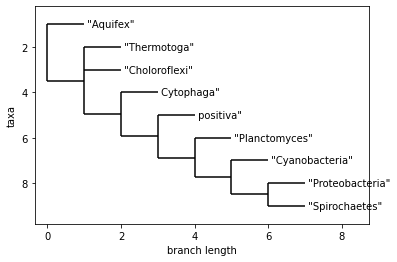

In [21]:
%matplotlib inline

from Bio import Phylo
from Bio.Phylo.PhyloXML import Phylogeny
#Creamos un archivo de texto y escribimos el código de nuestro árbol en él
x=open('tree.txt','w')
x.write('("Aquifex",("Thermotoga", "Choloroflexi",("Bacteroides Cytophaga",("Gram positiva",("Planctomyces",("Cyanobacteria",("Proteobacteria","Spirochaetes")))))));')
x.close()
#Lo abrimos para leerlo
x=open('tree.txt','r')
tree=Phylo.read('tree.txt','newick')
#El arbol tendrá raiz
tree.rooted=True
#Representamos el árbol simple.
print(tree)
Phylo.draw(tree)